In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings

from sklearn.feature_extraction.text import TfidfVectorizer #TF-IDF
import difflib # from difflib import SequenceMatcher
from sklearn.metrics.pairwise import cosine_similarity #cosine_similarity
warnings.filterwarnings("ignore")

# Popular Movies
- 18가지 대표 장르

In [6]:
movies_popular = pd.read_csv('./rep_movies.csv')
movies_popular.head(5)

,title,director,genre,plot,img_link
0,기생충,봉준호,드라마,“같이 잘 살면 안 될까요?”전원백수로 살 길 막막하지만 사이는 좋은 기택(송강호)...,http://file.koreafilm.or.kr/thm/02/00/05/15/tn...
1,극한직업,이병헌,코메디,낮에는 치킨장사! 밤에는 잠복근무!지금까지 이런 수사는 없었다!불철주야 달리고 구르...,http://file.koreafilm.or.kr/thm/02/00/04/85/tn...
2,해리포터,데이빗 예이츠,판타지,길고도 지루한 여름 날 호그와트 마법학교 다섯 번째 해를 기다리고 있는 해리포터(다...,http://file.koreafilm.or.kr/thm/02/00/00/95/tn...
3,센과 치히로의 행방불명,미야자키 하야오,가족,"짜증 잘 내고, 칭얼거리기 좋아하는 평범한 열 살짜리 소녀 치히로와 부모님은 이사 ...",http://file.koreafilm.or.kr/thm/02/00/03/88/tn...
4,어바웃타임,리차드 커티스,멜로,"모태솔로 팀(돔놀 글리슨)은 성인이 된 날, 아버지(빌 나이)로부터 놀랄만한 가문의...",http://file.koreafilm.or.kr/thm/02/00/02/08/tn...


In [7]:
# 영화 제목 + 줄거리

X = movies_popular['title'] + " " + movies_popular['plot']
X

0     기생충 “같이 잘 살면 안 될까요?”전원백수로 살 길 막막하지만 사이는 좋은 기택(...
1     극한직업 낮에는 치킨장사! 밤에는 잠복근무!지금까지 이런 수사는 없었다!불철주야 달...
2     해리포터 길고도 지루한 여름 날 호그와트 마법학교 다섯 번째 해를 기다리고 있는 해...
3     센과 치히로의 행방불명 짜증 잘 내고, 칭얼거리기 좋아하는 평범한 열 살짜리 소녀 ...
4     어바웃타임 모태솔로 팀(돔놀 글리슨)은 성인이 된 날, 아버지(빌 나이)로부터 놀랄...
5     소수의견 “피고는 경찰이 아들을 죽였다고 하고, 검사는 철거용역이라고 한다  원고 ...
6     올드보이 술에 취해 집에 가는 길, 누군가에게 납치당해 사설 감금방에 갇힌 오대수(...
7     더셀 하얗게 표백된 미모의 시체들, 상상을 초월한 살인 기구 '더 셀'... 단 4...
8     컨저링 모든 것은 악마가 시켰다!1981년, 미국 역사상 최초로 잔혹한 살인사건의 ...
9     노예12년 1840년대 미국에서는 노예 수입이 금지되자 흑인 납치 사건이 만연하게 ...
10    스파이더맨 마블 히어로의 세대교체!“어벤져스가 되려면 시험 같은 거 봐요?”‘시빌 ...
11    해운대 2004년 역사상 유례없는 최대의 사상자를 내며 전세계에 엄청난 충격을 안겨...
12    인터스텔라 “우린 답을 찾을 거야, 늘 그랬듯이”세계 각국의 정부와 경제가 완전히 ...
13    1917 두 명의 병사, 하나의 미션!그들이 싸워야 할 것은 적이 아니라 시간이었다...
14    스쿨 오브 락 록 밴드 단원인 듀이 핀은 로커답지 않게 뚱뚱하고 촌스러운 외모와 공...
15    말아톤 얼룩말과 초코파이를 좋아하는, 겉보기엔 또래 아이들과 다른 것 하나 없는 귀...
16    콜 미 바이 유어 네임 네 이름으로 날 불러줘 내 이름으로 널 부를게1983년 이탈...
17    라이프 오브 파이 얀 마텔의 베스트셀러 소설을 영화한 작품으로 소설은 폭풍우

In [8]:
len(X)

18

## Vectorizer => TF-IDF
- plot DATA => 18개 (대표 장르 수)

In [9]:
Vectorizer = TfidfVectorizer()

In [11]:
X_vec = Vectorizer.fit_transform(X)
X_vec

<18x1613 sparse matrix of type '<class 'numpy.float64'>'
	with 1837 stored elements in Compressed Sparse Row format>

In [12]:
X_vec = X_vec.toarray()
print(X_vec.shape)
X_vec

(18, 1613)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.06035048, 0.06035048,
        0.06035048],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
similarity = cosine_similarity(X_vec)
similarity

array([[1.        , 0.00455675, 0.00789599, 0.03486584, 0.        ,
        0.01741469, 0.00344794, 0.00392001, 0.        , 0.01251643,
        0.01293578, 0.0071949 , 0.0129011 , 0.01623887, 0.        ,
        0.01548776, 0.04185317, 0.00329348],
       [0.00455675, 1.        , 0.008342  , 0.03674951, 0.00541759,
        0.00503356, 0.00700066, 0.00212718, 0.        , 0.00655783,
        0.02291494, 0.00913008, 0.00345262, 0.00322768, 0.00452992,
        0.01646721, 0.00685704, 0.01194456],
       [0.00789599, 0.008342  , 1.        , 0.02339577, 0.02810806,
        0.01951709, 0.02925245, 0.01955902, 0.00258879, 0.01214864,
        0.01519941, 0.02285852, 0.01413722, 0.00739198, 0.00721793,
        0.02619204, 0.01015236, 0.02488968],
       [0.03486584, 0.03674951, 0.02339577, 1.        , 0.01475455,
        0.01403106, 0.02843784, 0.01166481, 0.00315277, 0.03522361,
        0.01128602, 0.01133911, 0.01235309, 0.00770581, 0.02305134,
        0.04779884, 0.01152079, 0.04613238],
    

In [14]:
similarity.shape

(18, 18)

In [15]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 8]

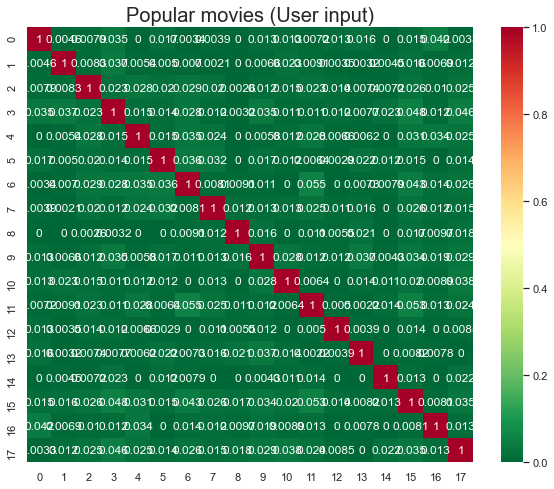

In [23]:
sns.heatmap(similarity, cmap='RdYlGn_r', annot=True) # (if) integer => fmt='d'

plt.title('Popular movies (User input)', fontsize=20)

plt.show()

# Independent Movies X Popular Movies
- User `input` => 상업영화 [movies_popular]
- Similarity `output` => 독립영화 [movies]

In [26]:
movies = pd.read_csv('./film_festival_ver3.csv')
movies.head(2)

,year,film_festival,title,director,field,award,genre,plot,rating,runtime,prodYear,actors,img_link,stills
0,2021,소리아 국제단편영화제,조지아,제이 박,NaN,NaN,"가족,범죄",병들고 가난한 부부가 딸의 억울한 죽음을 규명하기 위해 나선다. 가해자를 밝히지도 ...,12세관람가,29.0,2020.0,"이양희,이채경,김규남",https://ssl.pstatic.net/imgmovie/mdi/mit110/19...,http://file.koreafilm.or.kr/thm/01/copy/00/55/...
1,2021,보고타 단편영화제,미미(美味): 궁극의 식사,한재원,경쟁부문,NaN,"코메디,공포",미각을 잃은 미식 유튜버 성호는 어딘가 기괴한 음식점에 방문한다.,NaN,19.0,2020.0,"김최용준,정경임,이종윤",https://ssl.pstatic.net/imgmovie/mdi/mit110/20...,http://file.koreafilm.or.kr/thm/01/copy/00/59/...


In [27]:
# 영화 제목 + 줄거리

Y = movies['title'] + " " + movies['plot']
Y

0       조지아 병들고 가난한 부부가 딸의 억울한 죽음을 규명하기 위해 나선다. 가해자를 밝...
1       미미(美味): 궁극의 식사 미각을 잃은 미식 유튜버 성호는 어딘가 기괴한 음식점에 ...
2                                                     NaN
3       절해고도 절해고도. '육지에서 멀리 떨어진 바다의 외딴 섬'이라는 뜻을 지닌 제목은...
4       장갑을 사러 피아노를 가르치는 인경은 연인의 일본 발령 소식에 일본어 학원을 다니기...
                              ...                        
3357    엔조이 유어 썸머 어느 무더운 여름, 아직 회사 생활에 적응하지 못한 한 남자에게 ...
3358    너무 많이 본 사나이 승수는 앞집에 세들어 사는 여자를 몰래 카메라에 담기 위해 친...
3359    아리랑 아리랑 음악에 맞추어 한국 전통 문양들이 생성되고 소멸된다. 연출의도_ 관성...
3360    온실 작은 아파트에 홀로 사는 노인은 빨래, 신문 읽기, 라디오 듣기, 노래 따라 ...
3361    초촌면 신암리 삭막해진 농촌에서 유기농사를 짓는 주인공은 고집스러움 때문에 마을 사...
Length: 3362, dtype: object

In [29]:
len(Y)

3362

## Vectorizer
- plot DATA => 3055 rows

In [30]:
Vectorizer = TfidfVectorizer() # TF-IDF (words)

In [31]:
# np.nan == NaN (Not a Number, is null).
Y_na = Y.dropna(axis=0)
Y_na

0       조지아 병들고 가난한 부부가 딸의 억울한 죽음을 규명하기 위해 나선다. 가해자를 밝...
1       미미(美味): 궁극의 식사 미각을 잃은 미식 유튜버 성호는 어딘가 기괴한 음식점에 ...
3       절해고도 절해고도. '육지에서 멀리 떨어진 바다의 외딴 섬'이라는 뜻을 지닌 제목은...
4       장갑을 사러 피아노를 가르치는 인경은 연인의 일본 발령 소식에 일본어 학원을 다니기...
8       내일의 연인들 29세의 대학원생 정안은 어느 날, 선애 누나의 전화를 받는다. 선애...
                              ...                        
3357    엔조이 유어 썸머 어느 무더운 여름, 아직 회사 생활에 적응하지 못한 한 남자에게 ...
3358    너무 많이 본 사나이 승수는 앞집에 세들어 사는 여자를 몰래 카메라에 담기 위해 친...
3359    아리랑 아리랑 음악에 맞추어 한국 전통 문양들이 생성되고 소멸된다. 연출의도_ 관성...
3360    온실 작은 아파트에 홀로 사는 노인은 빨래, 신문 읽기, 라디오 듣기, 노래 따라 ...
3361    초촌면 신암리 삭막해진 농촌에서 유기농사를 짓는 주인공은 고집스러움 때문에 마을 사...
Length: 3055, dtype: object

In [49]:
type(Y_na)

pandas.core.series.Series

In [33]:
len(Y_na)

3055

In [35]:
# Plot NaN 개수
Y_cnt_nan = len(Y) - len(Y_na)
Y_cnt_nan

307

In [37]:
Y_vec = Vectorizer.fit_transform(Y_na)
Y_vec

<3055x44992 sparse matrix of type '<class 'numpy.float64'>'
	with 128348 stored elements in Compressed Sparse Row format>

In [38]:
Y_vec = Y_vec.toarray()
print(Y_vec.shape)
Y_vec

(3055, 44992)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Cosine Similarity
- 독립영화 X 독립영화 => 정사각 행렬
    - (3055, 3055)
- run time => 41.1 sec

In [39]:
similarity = cosine_similarity(Y_vec)
similarity

array([[1.        , 0.        , 0.00289128, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00289128, 0.        , 1.        , ..., 0.        , 0.01295611,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.00327306,
        0.        ],
       [0.        , 0.        , 0.01295611, ..., 0.00327306, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [40]:
similarity.shape

(3055, 3055)

## Recommendation Function
### Similarity - 독립영화
- categorical DATA == TOP10

In [41]:
def recommendContent(movie, movies=list(movies['title'])):
    title = difflib.get_close_matches(movie, movies)[0]
    index = movies.index(title)
    
    similar_movies = similarity[index]

    similar_movies = sorted(range(len(similar_movies)), key=lambda k: similar_movies[k], reverse = True)[1:11] # sorting Top 10
    recommended = [movies[i] for i in similar_movies]
    
    
    return recommended

In [42]:
# TEST
recommendContent("겨울의 피아니스트")

['델타 보이즈',
 '괜찮아, 임마',
 '지리멸렬',
 '높이뛰기',
 '은희',
 '피는 잔칫집에서 흘려라',
 '불한당들',
 '대한철강',
 '의자가 되는 법',
 '바느질 하는 여자']

# Similarity : 상업영화 =(input)=> 독립영화

## DataFrame + DataFrame

In [64]:
movies_Z = pd.concat([movies_popular, movies])
movies_Z

,title,director,genre,plot,img_link,year,film_festival,field,award,rating,runtime,prodYear,actors,stills
0,기생충,봉준호,드라마,“같이 잘 살면 안 될까요?”전원백수로 살 길 막막하지만 사이는 좋은 기택(송강호)...,http://file.koreafilm.or.kr/thm/02/00/05/15/tn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,극한직업,이병헌,코메디,낮에는 치킨장사! 밤에는 잠복근무!지금까지 이런 수사는 없었다!불철주야 달리고 구르...,http://file.koreafilm.or.kr/thm/02/00/04/85/tn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,해리포터,데이빗 예이츠,판타지,길고도 지루한 여름 날 호그와트 마법학교 다섯 번째 해를 기다리고 있는 해리포터(다...,http://file.koreafilm.or.kr/thm/02/00/00/95/tn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,센과 치히로의 행방불명,미야자키 하야오,가족,"짜증 잘 내고, 칭얼거리기 좋아하는 평범한 열 살짜리 소녀 치히로와 부모님은 이사 ...",http://file.koreafilm.or.kr/thm/02/00/03/88/tn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,어바웃타임,리차드 커티스,멜로,"모태솔로 팀(돔놀 글리슨)은 성인이 된 날, 아버지(빌 나이)로부터 놀랄만한 가문의...",http://file.koreafilm.or.kr/thm/02/00/02/08/tn...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3357,엔조이 유어 썸머,이형곤,드라마,"어느 무더운 여름, 아직 회사 생활에 적응하지 못한 한 남자에게 일어난 금요일부터 ...",NaN,2000.0,정동진독립영화제,재밌는 단편모음 1,NaN,15세관람가,23.0,2000.0,"오상무,권호웅,박철민",http://file.koreafilm.or.kr/thm/01/copy/00/36/...
3358,너무 많이 본 사나이,손재곤,"코메디,드라마,스릴러",승수는 앞집에 세들어 사는 여자를 몰래 카메라에 담기 위해 친구에게서 구형 VHS ...,https://ssl.pstatic.net/imgmovie/mdi/mit110/03...,2000.0,정동진독립영화제,독립장편영화 1,NaN,NaN,52.0,2000.0,"김상헌,김신성,이계영",http://file.koreafilm.or.kr/thm/01/copy/00/31/...
3359,아리랑,강준원,실험,아리랑 음악에 맞추어 한국 전통 문양들이 생성되고 소멸된다. 연출의도_ 관성적으로 ...,https://ssl.pstatic.net/imgmovie/mdi/mit110/13...,2000.0,정동진독립영화제,단편과 애니 1,NaN,NaN,4.0,2000.0,NaN,http://file.koreafilm.or.kr/thm/01/copy/00/50/...
3360,온실,김지훈,드라마,"작은 아파트에 홀로 사는 노인은 빨래, 신문 읽기, 라디오 듣기, 노래 따라 배우기...",https://ssl.pstatic.net/imgmovie/mdi/mit110/05...,2000.0,오버하우젠 국제단편영화제,NaN,NaN,NaN,15.0,1997.0,"안원복,민영기,박범진",http://file.koreafilm.or.kr/thm/01/copy/00/30/...


## RAW DATA

In [50]:
Z = pd.concat([X, Y_na])
Z

0       기생충 “같이 잘 살면 안 될까요?”전원백수로 살 길 막막하지만 사이는 좋은 기택(...
1       극한직업 낮에는 치킨장사! 밤에는 잠복근무!지금까지 이런 수사는 없었다!불철주야 달...
2       해리포터 길고도 지루한 여름 날 호그와트 마법학교 다섯 번째 해를 기다리고 있는 해...
3       센과 치히로의 행방불명 짜증 잘 내고, 칭얼거리기 좋아하는 평범한 열 살짜리 소녀 ...
4       어바웃타임 모태솔로 팀(돔놀 글리슨)은 성인이 된 날, 아버지(빌 나이)로부터 놀랄...
                              ...                        
3357    엔조이 유어 썸머 어느 무더운 여름, 아직 회사 생활에 적응하지 못한 한 남자에게 ...
3358    너무 많이 본 사나이 승수는 앞집에 세들어 사는 여자를 몰래 카메라에 담기 위해 친...
3359    아리랑 아리랑 음악에 맞추어 한국 전통 문양들이 생성되고 소멸된다. 연출의도_ 관성...
3360    온실 작은 아파트에 홀로 사는 노인은 빨래, 신문 읽기, 라디오 듣기, 노래 따라 ...
3361    초촌면 신암리 삭막해진 농촌에서 유기농사를 짓는 주인공은 고집스러움 때문에 마을 사...
Length: 3073, dtype: object

In [51]:
len(Z) # 18 + 3055

3073

In [53]:
Z_vec = Vectorizer.fit_transform(Z)
Z_vec

<3073x45705 sparse matrix of type '<class 'numpy.float64'>'
	with 130185 stored elements in Compressed Sparse Row format>

In [54]:
Z_vec = Z_vec.toarray()
print(Z_vec.shape)
Z_vec

(3073, 45705)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

- Run time : 52.9 sec

In [55]:
similarity_Z = cosine_similarity(Z_vec)
similarity_Z

array([[1.        , 0.00250094, 0.00619967, ..., 0.00637932, 0.        ,
        0.        ],
       [0.00250094, 1.        , 0.00362605, ..., 0.        , 0.01148216,
        0.        ],
       [0.00619967, 0.00362605, 1.        , ..., 0.00534948, 0.01143289,
        0.0104289 ],
       ...,
       [0.00637932, 0.        , 0.00534948, ..., 1.        , 0.0032541 ,
        0.        ],
       [0.        , 0.01148216, 0.01143289, ..., 0.0032541 , 1.        ,
        0.        ],
       [0.        , 0.        , 0.0104289 , ..., 0.        , 0.        ,
        1.        ]])

## MODEL : Recommedation Function

In [109]:
def recommendContent_Z(movie, movies_Z=list(movies_Z['title'])):
    title = difflib.get_close_matches(movie, movies_Z)[0]
    index = movies_Z.index(title)
    
    similar_movies = similarity_Z[index]

    similar_movies = sorted(range(len(similar_movies)), key=lambda k: similar_movies[k], reverse = True)[1:6] # sorting Top 5
    recommended = [movies_Z[i] for i in similar_movies]
    
    
    return recommended

In [93]:
# TEST
recommendContent_Z("기생충")

['별도 좋은데', '그리고 싶은 것', '첩첩산중', '파킹찬스', '오징어']

In [91]:
def recommendContentScore_Z(movie, movies_Z=list(movies_Z['title'])):
    title = difflib.get_close_matches(movie, movies_Z)[0]
    index = movies_Z.index(title)
    
    similar_movies = similarity[index]

    similar_movies_num = sorted(range(len(similar_movies)), key=lambda k: similar_movies[k], reverse = True)[1:7] # sorting Top 5
    recommended = [similar_movies[i] for i in similar_movies_num]

    # print(np.shape(similar_movies))
    return recommended

In [94]:
# TEST => 1.0 == self
recommendContentScore_Z("기생충")

[1.0,
 0.07692329012315358,
 0.07643517956410242,
 0.06842730050982408,
 0.06166482729339631,
 0.05893716492045208]

In [96]:
# unit: percent
print(np.round(recommendContentScore_Z("기생충"), 3) * 100)

[100.    7.7   7.6   6.8   6.2   5.9]


## 상업영화(18가지)와 유사한 독립영화 5가지 추천
- (18, 5)

In [100]:
for i in range(19):
    recommendContent_Z(movies_Z[i]['title'])

KeyError: 0

### 시간이 없으니... 그냥 고

In [116]:
movies_popular['title']

0              기생충
1             극한직업
2             해리포터
3     센과 치히로의 행방불명
4            어바웃타임
5             소수의견
6             올드보이
7               더셀
8              컨저링
9            노예12년
10           스파이더맨
11             해운대
12           인터스텔라
13            1917
14         스쿨 오브 락
15             말아톤
16    콜 미 바이 유어 네임
17       라이프 오브 파이
Name: title, dtype: object

In [120]:
# [recommendContent_Z(movies_popular['title'])]
content_Z = [
    recommendContent_Z("기생충"),
    recommendContent_Z("극한직업"),
    recommendContent_Z("해리포터"),
    recommendContent_Z("센과 치히로의 행방불명"),
    recommendContent_Z("어바웃타임"),
    recommendContent_Z("소수의견"),
    recommendContent_Z("올드보이"),
    recommendContent_Z("더셀"),
    recommendContent_Z("컨저링"),
    recommendContent_Z("노예12년"),
    recommendContent_Z("스파이더맨"),
    recommendContent_Z("해운대"),
    recommendContent_Z("인터스텔라"),
    recommendContent_Z("1917"),
    recommendContent_Z("스쿨 오브 락"),
    recommendContent_Z("말아톤"),
    recommendContent_Z("콜 미 바이 유어 네임"),
    recommendContent_Z("라이프 오브 파이"),
]
content_Z

[['별도 좋은데', '그리고 싶은 것', '첩첩산중', '파킹찬스', '오징어'],
 ['송한나', '하우스 패밀리', '회오리 바람', '졸업', '여고생'],
 ['한, 숨', '다른, 밤', '돌아가는 관람차', '회전목마', '치석'],
 ['위안', '파르티잔', '이장', '대만 이야기', '치석'],
 ['대한철강',
  '낮은 목소리 3 : 숨결',
  '인류의 영원한 테마',
  'In the Cold Cold Night-03_Repeat Mark',
  '여기, 나의 정원'],
 ['스트레인저', '여름의 나무들', '우리는 불스다', '이태원', '초대'],
 ['사회생활', '피사체', '그 여자', '지식인 박광만', '담피소'],
 ['충심, 소소', '사냥의 밤', '아무도 없는', '신의 아이들은 연기가 어렵다', '파출부'],
 ['용산', '물의 기원', '암사자들', '서울연애', '동아'],
 ['나를 찾는 전화벨이 울리면', '미필적 고의', '붕붕', '살기 위하여', '1917'],
 ['컴, 투게더', '로프공의 밤', '라이프 오브 파이', '송한나', '하우스 패밀리'],
 ['마트료시카', '지식인 박광만', '무녀도', '얼라이브', '무림일검의 사생활'],
 ['탄피', '귀신고래', '착한 사람은 거짓말 하지 않는다', '데스퍼럿 크로싱', '스위밍걸'],
 ['물의', '구럼비-바람이 분다', '아프지않아', '물의 기원', '나를 찾는 전화벨이 울리면'],
 ['적의 사과', '바다 위의 별', '디어파파', '영화, 관', '대학탐방'],
 ['잠시 쉬어가다', '의자가 되는 법', '바느질 하는 여자', '꾸구리', '청춘과부'],
 ['악당의 사연', '463 - 포엠 오브 더 로스트', '너는 결코 서둘지 말라', '밥상행사', '갈라파고스'],
 ['낮과 밤', '친구집', '파르티잔', '안녕 자지', '스파이더맨']]

In [ ]:
popular_movies = []
independent_movie = []
df_Z = pd.DataFrame(content_Z, index=popular_movies, columns=independent_movie)
df_Z

In [121]:
content_Z.to_csv("popularMovies_independent5.csv", index=True, header=True)

AttributeError: 'list' object has no attribute 'to_csv'

# Independent Movies X Popular Movies
- User `input` => 상업영화
- Similarity `output` => 독립영화

In [118]:
[
    print(np.round(recommendContentScore_Z("기생충"), 3) * 100),
    print(np.round(recommendContentScore_Z("극한직업"), 3) * 100),
    print(np.round(recommendContentScore_Z("해리포터"), 3) * 100),
    print(np.round(recommendContentScore_Z("센과 치히로의 행방불명"), 3) * 100),
    print(np.round(recommendContentScore_Z("어바웃타임"), 3) * 100),
    print(np.round(recommendContentScore_Z("소수의견"), 3) * 100),
    print(np.round(recommendContentScore_Z("올드보이"), 3) * 100),
    print(np.round(recommendContentScore_Z("더셀"), 3) * 100),
    print(np.round(recommendContentScore_Z("컨저링"), 3) * 100),
    print(np.round(recommendContentScore_Z("노예12년"), 3) * 100),
    print(np.round(recommendContentScore_Z("스파이더맨"), 3) * 100),
    print(np.round(recommendContentScore_Z("해운대"), 3) * 100),
    print(np.round(recommendContentScore_Z("인터스텔라"), 3) * 100),
    print(np.round(recommendContentScore_Z("1917"), 3) * 100),
    print(np.round(recommendContentScore_Z("스쿨 오브 락"), 3) * 100),
    print(np.round(recommendContentScore_Z("말아톤"), 3) * 100),
    print(np.round(recommendContentScore_Z("콜 미 바이 유어 네임"), 3) * 100),
    print(np.round(recommendContentScore_Z("라이프 오브 파이"), 3) * 100),
]

[100.    7.7   7.6   6.8   6.2   5.9]
[100.    9.8   9.8   8.    5.9   5.6]
[4.6 4.3 3.9 3.8 3.7 3.7]
[6.6 6.5 6.4 6.  5.1 4.9]
[5.9 5.3 5.  4.8 4.8 4.8]
[17.6  8.1  7.4  6.5  6.5  5.8]
[11.4  8.3  8.1  7.4  6.8  6.7]
[15.4 14.5 10.2  9.9  9.9  9.8]
[7.8 7.1 6.9 6.  6.  5.8]
[6.1 6.1 5.9 5.7 5.3 5. ]
[7.5 6.9 6.5 6.4 6.2 6.2]
[8.1 7.8 5.9 5.9 5.9 5.4]
[21.6  9.3  9.2  7.7  6.9  6.5]
[7.5 7.3 7.1 5.7 5.1 4.8]
[7.5 7.5 6.1 5.9 5.9 5.8]
[10.   8.1  7.8  7.5  7.2  7.1]
[9.4 8.3 8.  7.3 7.3 7.3]
[9.1 8.1 6.4 6.4 6.4 6.1]


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]